In [1]:
!pip install plotly_express

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)

plt.style.use("fivethirtyeight")
color_palette = sns.color_palette("Set2")+sns.color_palette("Paired")+sns.color_palette("hls", 8)+sns.color_palette("husl", 8)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#import the datasets
vd=pd.read_csv("D:\\DA Project\\videos-stats.csv")
cm=pd.read_csv("D:\\DA Project\\comments.csv")

In [4]:
#display the number of rows and columns of the datasets 
vd.shape

(1881, 8)

In [5]:
cm.shape

(18409, 5)

In [6]:
vd.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [7]:
cm.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [8]:
#checking and removing empty columns
vd.drop(columns="Unnamed: 0", inplace=True)
cm.drop(columns="Unnamed: 0", inplace=True)

In [9]:
#displays the statistical value for the numerical data 
vd.describe()

,Likes,Comments,Views
count,1.879000e+03,1879.000000,1.879000e+03
mean,1.700610e+05,7863.331559,1.161292e+07
std,7.962293e+05,37879.964926,1.084450e+08
min,-1.000000e+00,-1.000000,2.500000e+01
25%,2.672500e+03,199.000000,8.451500e+04
50%,1.478700e+04,814.000000,5.917210e+05
75%,6.090600e+04,3377.500000,2.804978e+06
max,1.644556e+07,732818.000000,4.034122e+09


In [10]:
cm.describe()

,Likes,Sentiment
count,18409.000000,18409.000000
mean,1040.019447,1.493998
std,10651.366148,0.709928
min,0.000000,0.000000
25%,5.000000,1.000000
50%,29.000000,2.000000
75%,190.000000,2.000000
max,891372.000000,2.000000


In [11]:
#Data Cleaning

In [12]:
#checks for number of  null values in each column 
vd.isnull().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

In [13]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 103.0+ KB


In [14]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Video ID   18409 non-null  object 
 1   Comment    18408 non-null  object 
 2   Likes      18409 non-null  float64
 3   Sentiment  18409 non-null  float64
dtypes: float64(2), object(2)
memory usage: 575.4+ KB


In [15]:
cm.isnull().sum()

Video ID     0
Comment      1
Likes        0
Sentiment    0
dtype: int64

In [16]:
#display the rows which have null values in Views
vd.loc[vd.Views.isnull()]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN
1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN


In [17]:
#display the rows which have -1 values in likes 
vd.loc[vd.Likes == -1]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
243,How To Build A Business That Works | Brian Tra...,MN7yfV4UuCI,2021-02-09,business,-1.0,1144.0,676300.0
266,ตลาดถุงมือยางทรุด! ฉุดราคาร่วงลงทุนหด | BUSINE...,cG37cEi1nPc,2022-08-23,business,-1.0,13.0,12332.0
583,DON&#39;T GOOGLE THIS STUFF,NAV2laKrDv4,2017-08-28,google,-1.0,18676.0,6515548.0
1016,15 Kilo Zayıf Gösteren Kız Makyajı |Arkadaşlar...,-NcdEl405KY,2022-08-23,mukbang,-1.0,335.0,27451.0
1677,FULL Marvel Studios Panel from Hall H | San Di...,rf-NqJQJHBU,2022-07-24,marvel,-1.0,821.0,553892.0
1710,The Magnificent Seven - Full Movie In English ...,1MZY_0tYmrs,2021-12-29,movies,-1.0,180.0,2389222.0
1714,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,movies,-1.0,105.0,1541874.0


In [18]:
#display the rows which have -1 values in Comments 
vd.loc[vd.Comments == -1]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1701,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105.0,-1.0,28219.0
1709,BEST Auditions Of Songs From Movies | Amazing ...,ZcBBGC8_mfU,2022-07-25,movies,20138.0,-1.0,5351960.0


In [19]:
#from above, the comments which are negative their video ID is taken 
#From the Comment dataset the once with same video ID is displayed 
cm.loc[(cm["Video ID"] == "__7MkaWFObQ") | (cm["Video ID"] == "ZcBBGC8_mfU")]

,Video ID,Comment,Likes,Sentiment
16640,__7MkaWFObQ,[ ] [v] ¡EXCELENTE\n Western Clásico y me en...,1.0,1.0
16641,__7MkaWFObQ,It would have been a nice movie only it's real...,3.0,1.0
16642,__7MkaWFObQ,Thanks for the movie,0.0,2.0
16643,__7MkaWFObQ,Worthless movie and screwed up sound track ......,6.0,0.0
16644,__7MkaWFObQ,👍🌹🌹🌹,0.0,2.0
16645,__7MkaWFObQ,NOT EVEN THE SAME MOVIE AND ITS A BUNCH OF JOC...,0.0,0.0
16646,__7MkaWFObQ,What a DUD movie! Voices are out of sync and t...,0.0,0.0
16647,__7MkaWFObQ,Not loud enough!,1.0,0.0
16648,__7MkaWFObQ,Rubbish Waste of Time.,0.0,0.0
16718,ZcBBGC8_mfU,Did you ENJOY watching this? Do you want to se...,107.0,2.0


In [20]:
#The rows with null values are dropped in both the data sets 
vd.dropna(inplace=True)
cm.dropna(inplace=True)

In [21]:
#The rows with -1 values are dropped
vd_droped = vd[vd['Likes']==-1].index
vd.drop(vd_droped , inplace=True)

In [22]:
#As the table is empty, the -1 values have been dropped 
vd.loc[vd.Likes ==-1]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views


In [23]:
vdc_c_droped = vd[vd['Comments']==-1].index
vd.drop(vdc_c_droped , inplace=True)

In [24]:
vd.loc[vd.Comments==-1]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views


In [25]:
#converting the data types of certain columns to int64
vd[["Likes","Comments","Views"]] = vd[["Likes","Comments","Views"]].astype(np.int64)
cm[["Sentiment","Likes"]]= cm[["Sentiment","Likes"]].astype(np.int64)

In [26]:
#ploting a pie chart based on the catagory 
px.pie(values=vd.Keyword.value_counts(),
       names=vd.Keyword.value_counts().index,title="Category Breakdown")

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

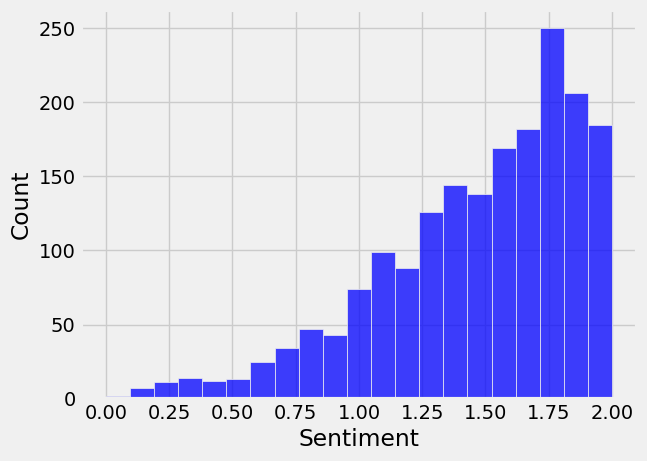

In [27]:
#histogram to show the sentiment values and the number of videos for each sentiment value
avg = cm.groupby("Video ID").aggregate({"Sentiment": "mean"})
sns.histplot(avg['Sentiment'], color='blue')

In [28]:
#observation 
#The majority of the videos have high level of positive sentiment.
#The distribution is highly right skewed

In [29]:
#regression plot to show the deviation of likes/views for the videos based on the sentiments of the videos.
avg.reset_index(inplace=True)
avg['Likes/Views'] = 1000 * (vd['Likes'] / vd['Views'])

<AxesSubplot:xlabel='Sentiment', ylabel='Likes/Views'>

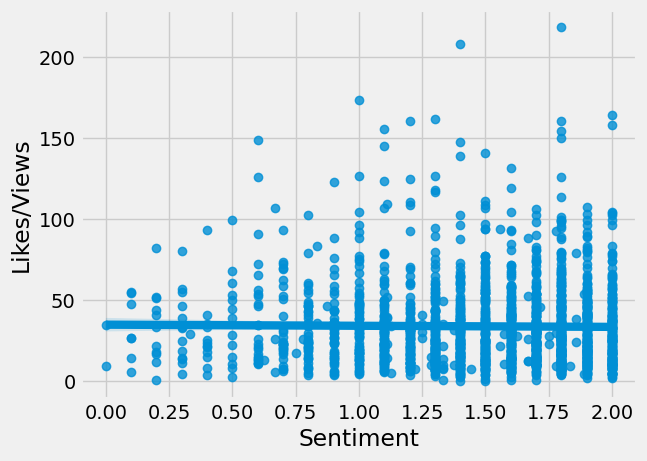

In [30]:
sns.regplot(data=avg, x='Sentiment', y='Likes/Views')

In [31]:
#observation 
#the data is well deviated 

In [32]:
#correlation of all columns 
avg.corr()

,Sentiment,Likes/Views
Sentiment,1.000000,-0.010988
Likes/Views,-0.010988,1.000000


In [33]:
#surprisingly,the avg sentiment of top 10 most liked comments
#reveals very little about the popularity or performance of the video 
#Perhaps a higher association between the average emotion and the like/dislike ratio of each
#YouTube video would be observed if it were possible to access the dislikes of each video.
#We can only sumrise as to what impact the a fore mentioned exploration would have had because YouTube has since erased dislikes


In [34]:
#This graph depicts the count of videos for each sentiment score
SentimentScores = cm.Sentiment.value_counts().index
frequencies = cm.Sentiment.value_counts().values

px.bar(x=SentimentScores, y=frequencies,text=[f"Count: {frequencies[0]}",f"Count: {frequencies[1]}",f"Count: {frequencies[2]}"],
      title="Sentiment Scores Bar Plot",width=800,height=400)

In [35]:
#bar graph to  deals with the average number of likes for each category of videos
gnr = vd.groupby("Keyword").aggregate({"Likes": "mean", "Views": "mean", "Comments": "mean"})
gnr.reset_index(inplace=True)

<AxesSubplot:xlabel='Keyword', ylabel='Likes'>

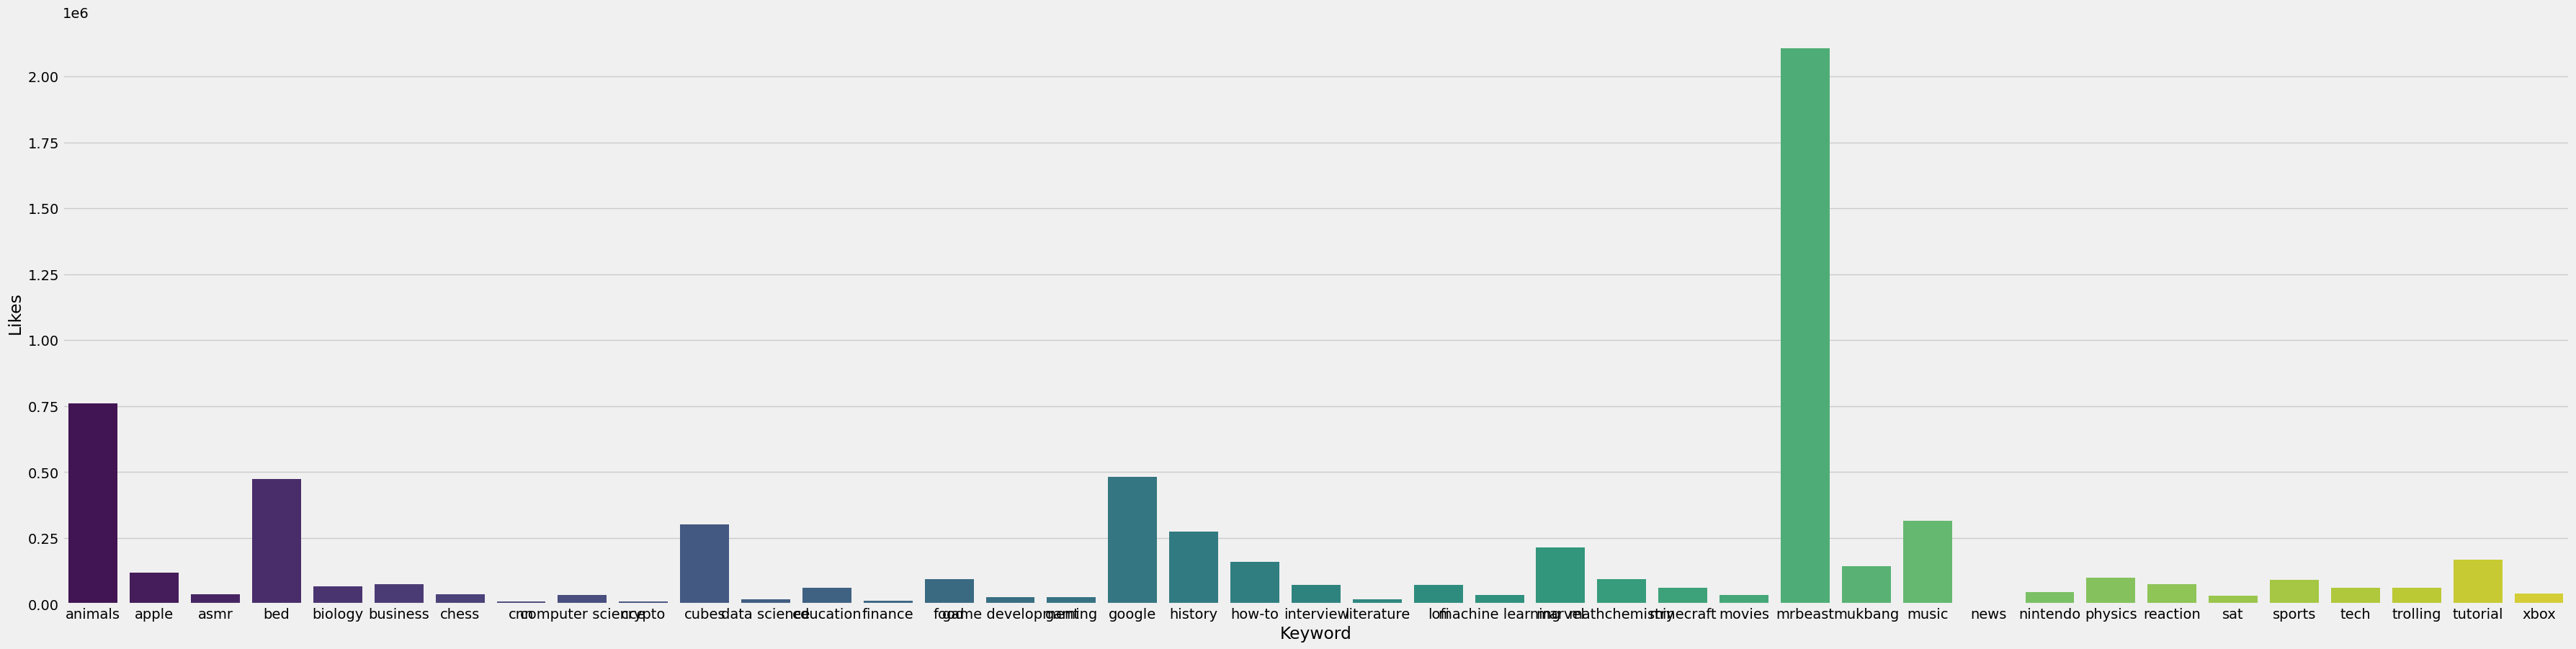

In [36]:
plt.figure(figsize=(40, 10))
sns.barplot(data=gnr, x='Keyword', y='Likes', palette='viridis')

<AxesSubplot:xlabel='Keyword', ylabel='Views'>

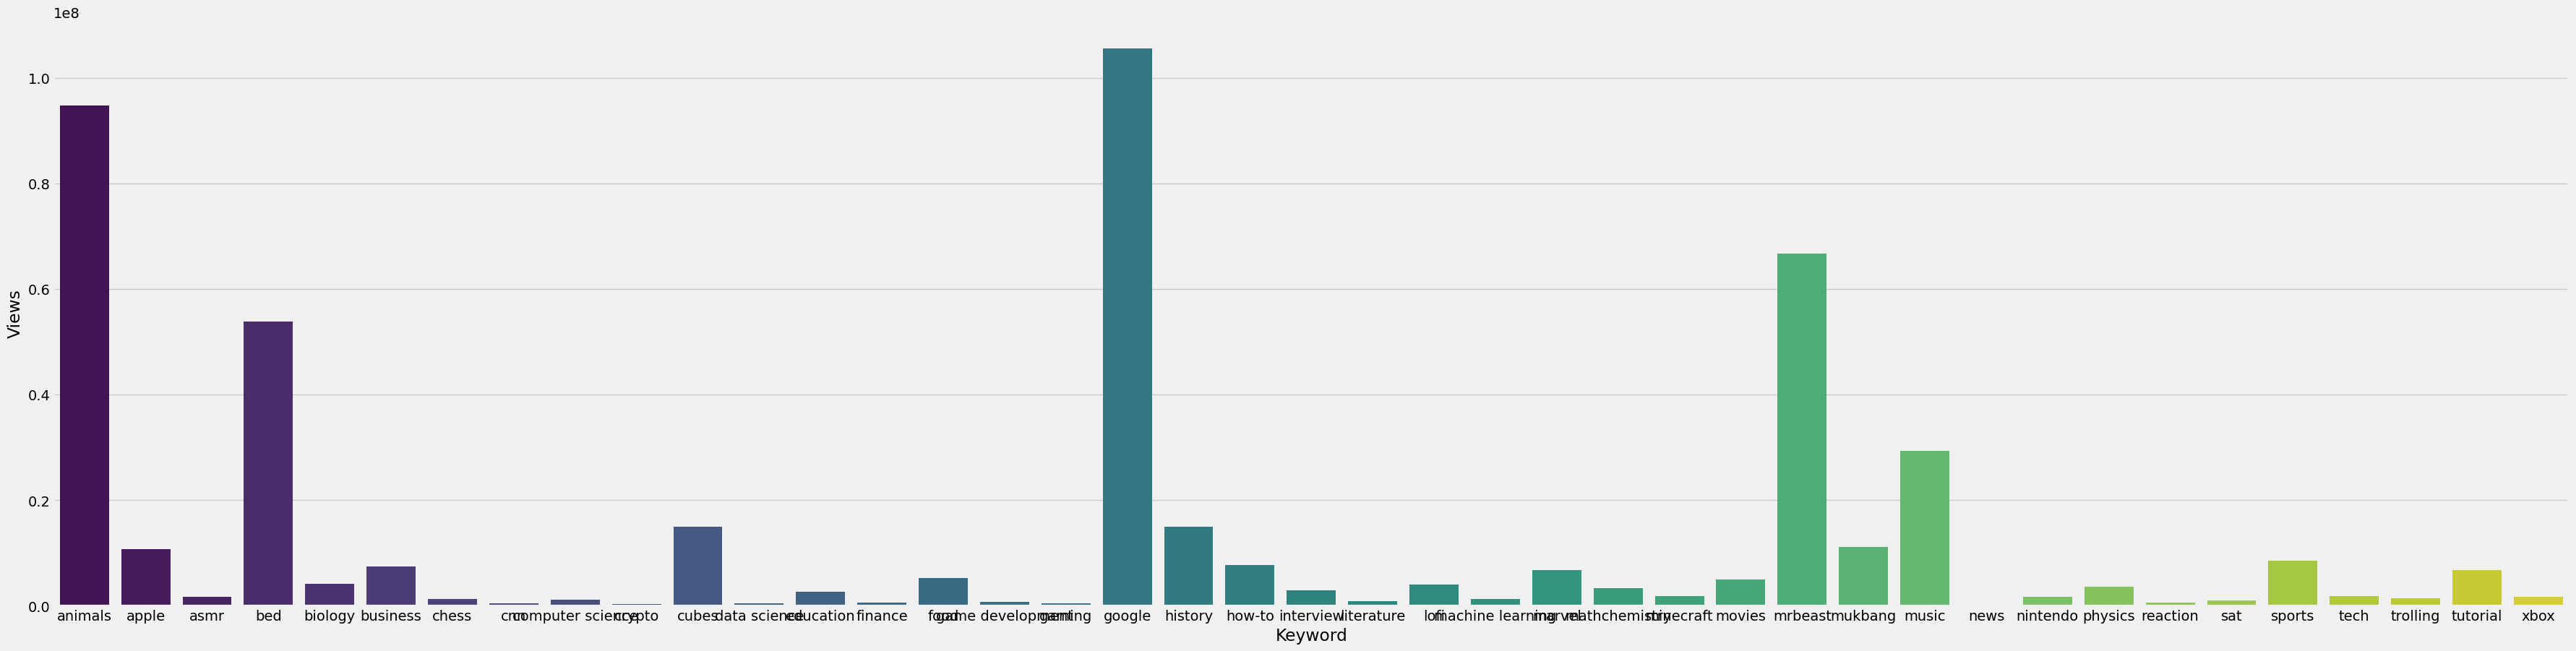

In [37]:
#bar graph to  deals with the average number of views for each category of videos
plt.figure(figsize=(40, 10))
sns.barplot(data=gnr, x='Keyword', y='Views', palette='viridis')

<AxesSubplot:xlabel='Keyword', ylabel='Comments'>

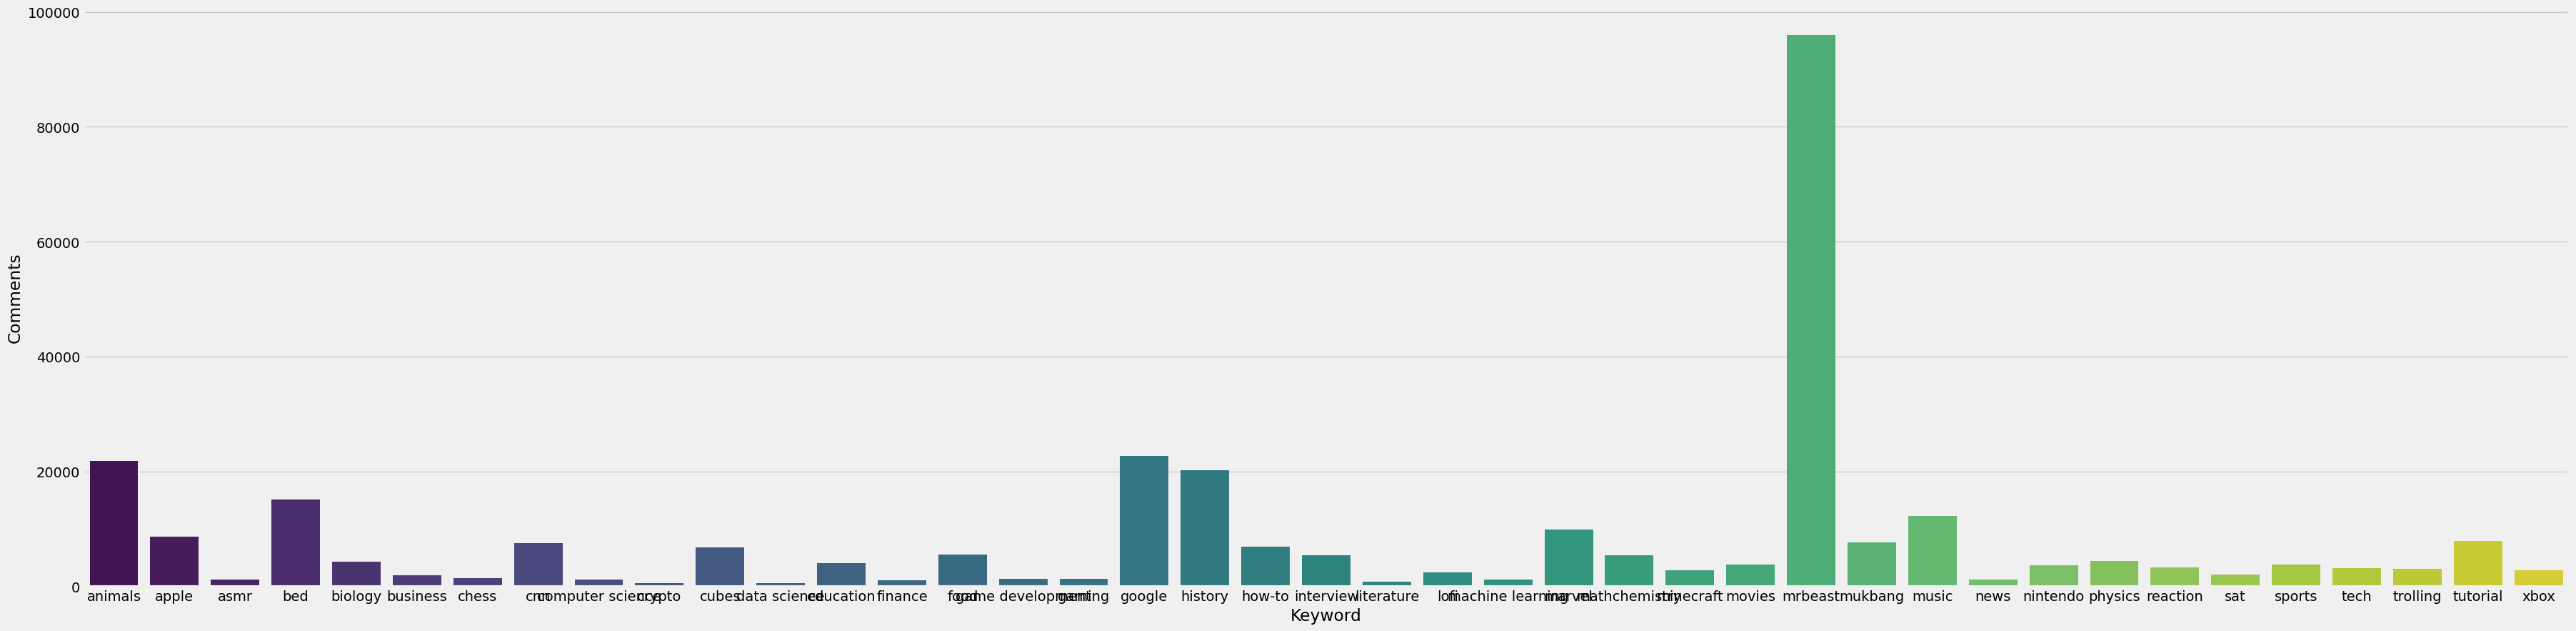

In [38]:
#bar graph to deals with the average number of likes for each category of Comments
plt.figure(figsize=(40, 10))
sns.barplot(data=gnr, x='Keyword', y='Comments', palette='viridis')

In [39]:
#In practically all of these categories, the keyword 
#"Mr. Beast" is at the top of the list.
#The Google and animal keywords are ranked top in terms of views. 
#Additionally, these two categories are remarkably similar to one 
#another in every way.

In [40]:
#histogram indicating the number of videos published year wise
px.histogram(vd, x='Published At',color_discrete_sequence=["blue"])

In [41]:
#displaying the first 5 rows of the video dataset
vd.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779,4306,1758063
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825,3338,1564007
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566,1426,922918
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513,5155,1855644


In [42]:
#creating a list of all title of videos and their respective keywords
video_title = list(vd["Title"].values)
kw = list(vd["Keyword"].values)

In [43]:
#splitting the title of the video to extract the keyword from it
title = [v_t.split('|')[0] for v_t in video_title]

In [44]:
#cleaning the dataset and making a new list i.e, corpus of the titles
stopword= stopwords.words('english')
corpus = []
for vt in title:
    #removing stopwords, converting to lowercase, removing non-alphabetical characters
    title_cleaning = re.sub('[^a-zA-Z]', ' ', vt)
    title_cleaning = title_cleaning.lower()
    title_cleaning = title_cleaning.split()
    #stemming
    stemming = PorterStemmer()
    title_cleaning = [stemming.stem(token) for token in title_cleaning if not token in set(stopword)]
    corpus.append(' '.join(title_cleaning))

In [45]:
#Count vectorizer is used to transform words in the form of the vectors
count_vect = CountVectorizer(max_features=1600)
X = count_vect.fit_transform(corpus).toarray()
#converts the label to machine-readable form
label_encod = LabelEncoder()
y = label_encod.fit_transform(kw)

In [46]:
#splitting the data into test and train datasets 
#20%  of the dataset is used for testing and 80% is trained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [47]:
#building the logistic regression model to classify the videos according to category
#OVR(One-vs–rest)method is been used
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
#predicting the accuracy score for the classification
accuracy= accuracy_score(y_test, y_predict)
print("Accuracy is: {}".format(accuracy))

Accuracy is: 0.8262032085561497
